## Clustering 3D Blobs 

In [12]:
import pandas as pd
import numpy as np
import time
import warnings
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import time    
import random
from hdbscan import HDBSCAN
import sys
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics.cluster import adjusted_rand_score
import math
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.datasets.samples_generator import make_blobs
import warnings

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
#function to get maximum value for the chosen index - in this case rand
def get_max_by_col(parameters, col):
    # col - 1 is used to 'hide' the fact lists' indexes are zero-based from the caller
    return max(parameters, key=lambda x: x[col - 1])

CLUSTERING FUNCTIONS

In [1]:
#dbscan with plot
def DBSCAN_GRID(X):
    parameters = []
    # Starting a tally of total iterations
    eps_space = np.arange(0.1, 2, 0.1)
    min_samples_space = np.arange(1,20, 1)
    metrics_space=['euclidean','manhattan','chebyshev','hamming']
    n_iterations = 0
    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:
            for metric_val in metrics_space:
                dbscan_grid = DBSCAN(eps = eps_val,min_samples = samples_val,metric=metric_val)
                # fit_transform
                clusters = dbscan_grid.fit_predict(X = X)
                unique = np.unique(clusters)
                if (len(unique) < 10):
                        rand_score=adjusted_rand_score(labels_true, clusters)
                        # Increasing the iteration tally with each run of the loop
                        n_iterations += 1
                        # Appending the lst each time n_clusters criteria is reached
                        parameters.append([eps_val,samples_val,metric_val,rand_score])
    maximum_rand=get_max_by_col(parameters, 4)
    a=maximum_rand[0]
    b=maximum_rand[1]
    c=maximum_rand[2]
    rand=maximum_rand[3]
    db6 = DBSCAN(eps = a,min_samples = b,metric=c)
    y_pred1=db6.fit_predict(X)
    ax = plt.axes(projection="3d")
    ax.scatter(X[:,0], X[:,1],X[:,2],c=y_pred1,cmap='rainbow', alpha=0.7, edgecolors='b')  
    for angle in range(0, 360):
        ax.view_init(0, 20)
    plt.title("DBSCAN")
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred1),a,b,c)

In [2]:
def hdbscan(X,min_clust_size):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hdb = HDBSCAN(algorithm='best', alpha=1.0, leaf_size=40,metric='chebyshev',
                  min_cluster_size=min_clust_size,
                  cluster_selection_epsilon=0.5,
                  min_samples=None).fit(X)
    labels=hdb.labels_
    y_pred2 = hdb.labels_
    ax = plt.axes(projection="3d")
    ax.scatter(X[:,0], X[:,1],X[:,2],c=y_pred2,cmap='rainbow', alpha=0.7, edgecolors='b')  
    for angle in range(0, 360):
        ax.view_init(0, 20)
    plt.title("HDBSCAN")
    print('HDBSCAN')
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred2))

In [3]:
def spectal(X):
    t1 = time.time()
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                            eigen_tol=0.0, assign_labels="discretize").fit(X)
    y_pred3 = db.fit_predict(X)
    spec_elapsed_time = time.time() - t1
    
    ax = plt.axes(projection="3d")
    ax.scatter(X[:,0], X[:,1],X[:,2],c=y_pred3,cmap='rainbow', alpha=0.7, edgecolors='b')  
    for angle in range(0, 360):
        ax.view_init(0, 20)
    plt.title("SPECTRAL")
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred3))

In [4]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred4 = km.predict(X)
    
    ax = plt.axes(projection="3d")
    ax.scatter(X[:,0], X[:,1],X[:,2],c=y_pred4,cmap='rainbow', alpha=0.7, edgecolors='b')  
    for angle in range(0, 360):
        ax.view_init(0, 20)
    plt.title("K-means")
    print('K-means')
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred4))
    


In [5]:
def hier(X, n_clusters):
    t1 = time.time()
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters) #default is with ward linkage
    y_pred5 = hier.fit_predict(X)
    Hier_elapsed_time = time.time() - t1
    plt.style.use('fivethirtyeight')
    ax = plt.axes(projection="3d")
    ax.scatter(X[:,0], X[:,1],X[:,2],c=y_pred5,cmap='rainbow', alpha=0.7, edgecolors='b')  
    for angle in range(0, 360):
        ax.view_init(0, 20)
    plt.title("Hierarchical")
    print('Hierarchical')
    print('Adjusted Rand Score: ',adjusted_rand_score(labels_true, y_pred5))

functions with non plots

In [6]:
#dbscan with no plot
def DBSCAN_GRID2(X):
    parameters = []
    # Starting a tally of total iterations
    eps_space = np.arange(0.1, 3, 0.1)
    min_samples_space = np.arange(1,20, 1)
    metrics_space=['euclidean','manhattan','chebyshev','hamming']
    n_iterations = 0
    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:
            for metric_val in metrics_space:
                dbscan_grid = DBSCAN(eps = eps_val,min_samples = samples_val,metric=metric_val)
                # fit_transform
                clusters = dbscan_grid.fit_predict(X = X)
                unique = np.unique(clusters)
                if (len(unique) < 10):
                        rand_score=adjusted_rand_score(labels_true, clusters)
                        # Increasing the iteration tally with each run of the loop
                        n_iterations += 1
                        # Appending the lst each time n_clusters criteria is reached
                        parameters.append([eps_val,samples_val,metric_val,rand_score])
    maximum_rand=get_max_by_col(parameters, 4)
    a=maximum_rand[0]
    b=maximum_rand[1]
    c=maximum_rand[2]
    rand=maximum_rand[3]
    db6 = DBSCAN(eps = a,min_samples = b,metric=c)
    y_pred1=db6.fit_predict(X)
    db_rand2.append(adjusted_rand_score(labels_true, y_pred1))

In [7]:
def hdbscan_2(X,min_clust_size):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hdb = HDBSCAN(algorithm='best', alpha=1.0, leaf_size=40,metric='chebyshev',
                  min_cluster_size=min_clust_size,
                  cluster_selection_epsilon=0.5,
                  min_samples=None).fit(X)
    labels=hdb.labels_
    y_pred2 = hdb.labels_
    hdb_rand2.append(adjusted_rand_score(labels_true, y_pred2))

In [8]:
def spectral_2(X):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                            eigen_tol=0.0, assign_labels="discretize").fit(X)
    y_pred3 = db.fit_predict(X)
    spec_rand2.append(adjusted_rand_score(labels_true, y_pred3))

In [9]:
def hier_2(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters) #default is with ward linkage
    y_pred5 = hier.fit_predict(X)
    h_rand2.append(adjusted_rand_score(labels_true, y_pred5))

In [10]:
def kmeans_2(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred4 = km.predict(X)
    k_rand2.append(adjusted_rand_score(labels_true, y_pred4))

#### HIGH NOISE


In [17]:
X, labels_true = make_blobs(n_samples=1000, centers=2, n_features=3,cluster_std=2.5)

Adjusted Rand Score:  0.9273197464097377 1.9000000000000001 9 chebyshev


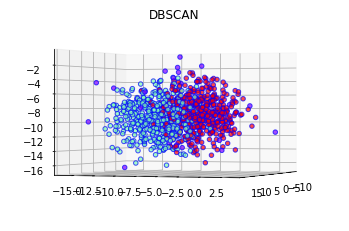

In [18]:
#DBSCAN 
DBSCAN_GRID(X)

HDBSCAN
Adjusted Rand Score:  0.5059480077545366


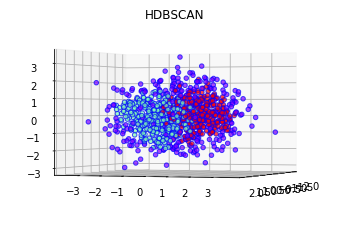

In [19]:
#HDBSCAN
hdbscan(X,10)

K-means
Adjusted Rand Score:  0.8910269195827347


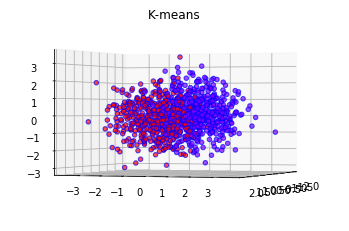

In [20]:
#kmeans
kmeans(X,2)

Adjusted Rand Score:  0.9761200961923848


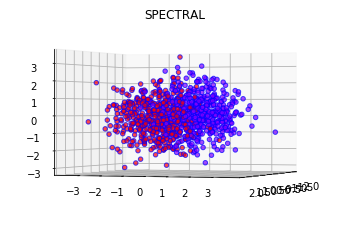

In [21]:
#Spectral
spectal(X)

Hierarchical
Adjusted Rand Score:  0.9721681403921116


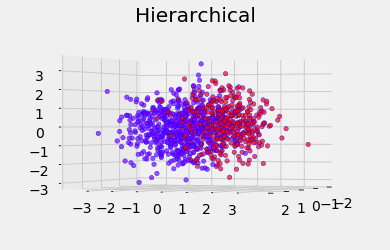

In [22]:
#Hierarchical
hier(X,2)

In [127]:
#Creation of lists to store results
k_rand2=[]
h_rand2=[]
db_rand2=[]
hdb_rand2=[]
spec_rand2=[]

for i in range(100):
    X, labels_true = make_blobs(n_samples=500, centers=2, n_features=3,cluster_std=2.5)
    X = StandardScaler().fit_transform(X)

    kmeans_2(X,2)
    hier_2(X,2)
    hdbscan_2(X,5)
    DBSCAN_GRID2(X)
    spectral_2(X)
    
#Creation of the dataframe to store results
columns=['Hierarchical Rand Score','K-means Rand Score','DBSCAN Rand Score',
         'HDBSCAN Rand Score','Spectral Rand Score']
scores= [h_rand2,k_rand2,db_rand2,hdb_rand2,spec_rand2]

a={'Hierarchical': h_rand2, 
   'K-means': k_rand2,
   'DBSCAN':db_rand2,
   'HDBSCAN':hdb_rand2,
   'Spectral':spec_rand2}
df_high = pd.DataFrame(data=a)
df_high.loc['mean'] = df_high.mean() #mean of the scores for each clustering method
df_high.loc['Std'] = df_high.std() #standard deviation of the scores for each clustering method
df_high=df_high.round(3)
df_high

,Hierarchical,K-means,DBSCAN,HDBSCAN,Spectral
0,0.921,0.839,0.785,0.656,0.960
1,0.535,0.577,0.077,0.027,0.589
2,0.952,0.945,0.627,0.001,0.945
3,1.000,1.000,0.996,0.952,1.000
4,0.906,0.906,0.792,0.555,0.929
...,...,...,...,...,...
97,0.899,0.899,0.788,0.432,0.960
98,1.000,1.000,1.000,0.992,1.000
99,1.000,0.992,0.988,0.926,1.000
mean,0.851,0.865,0.730,0.572,0.881


In [160]:
#save to cvs
df_high.to_csv('3DBlobs_HIGHnoise.csv')
df_high.to_excel('3DBlobs_HIGHnoise.xls')
df_high.to_latex('3DBlobs_HIGHnoise.tex')


#### MEDIUM NOISE

In [23]:
X, labels_true = make_blobs(n_samples=1000, centers=2, n_features=3,cluster_std=1.7)

Adjusted Rand Score:  0.8815931190311626 1.3000000000000003 19 chebyshev


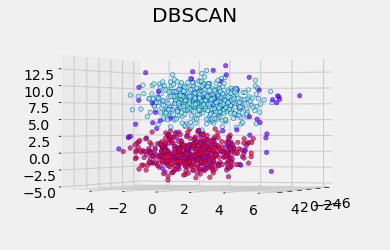

In [24]:
#DBSCAN 
DBSCAN_GRID(X)

HDBSCAN
Adjusted Rand Score:  0.2790656977057388


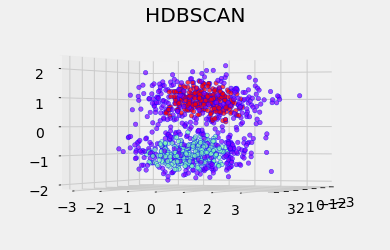

In [25]:
#HDBSCAN
hdbscan(X,30)

K-means
Adjusted Rand Score:  0.8536295205118665


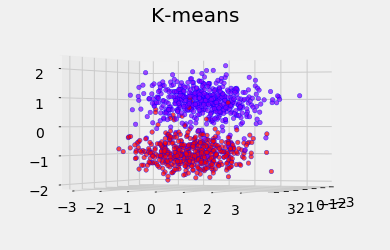

In [26]:
kmeans(X,2)

Adjusted Rand Score:  0.9564403983648754


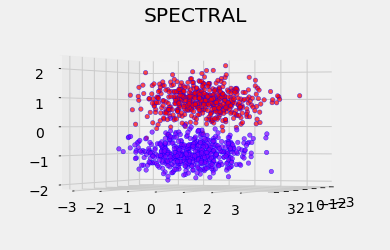

In [27]:
#Spectral
spectal(X)

Hierarchical
Adjusted Rand Score:  0.9564403969681747


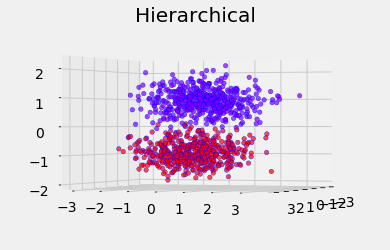

In [28]:
#Hierarchical
hier(X,2)

In [117]:
#Creation of lists to store results
warnings.filterwarnings("ignore")

k_rand2=[]
h_rand2=[]
db_rand2=[]
hdb_rand2=[]
spec_rand2=[]

for i in range(100):
    X, labels_true = make_blobs(n_samples=500, centers=2, n_features=3,cluster_std=1.7)
    X = StandardScaler().fit_transform(X)

    kmeans_2(X,2)
    hier_2(X,2)
    hdbscan_2(X,5)
    DBSCAN_GRID2(X)
    spectral_2(X)
    
#Creation of the dataframe to store results
columns=['Hierarchical Rand Score','K-means Rand Score','DBSCAN Rand Score',
         'HDBSCAN Rand Score','Spectral Rand Score']
scores= [h_rand2,k_rand2,db_rand2,hdb_rand2,spec_rand2]

a={'Hierarchical': h_rand2, 
   'K-means': k_rand2,
   'DBSCAN':db_rand2,
   'HDBSCAN':hdb_rand2,
   'Spectral':spec_rand2}
df_medium = pd.DataFrame(data=a)
df_medium.loc['mean'] = df_medium.mean() #mean of the scores for each clustering method
df_medium.loc['Std'] = df_medium.std() #standard deviation of the scores for each clustering method
df_medium=df_medium.round(3)
df_medium

,Hierarchical,K-means,DBSCAN,HDBSCAN,Spectral
0,1.000,1.000,1.000,1.000,1.000
1,1.000,0.960,0.988,0.953,1.000
2,0.992,0.952,0.902,0.771,0.976
3,0.992,0.968,0.980,0.929,1.000
4,1.000,1.000,1.000,0.968,1.000
...,...,...,...,...,...
97,1.000,1.000,1.000,1.000,1.000
98,0.992,1.000,0.984,0.899,1.000
99,1.000,1.000,1.000,1.000,1.000
mean,0.950,0.954,0.893,0.810,0.967


In [118]:
#save to cvs
df_medium.to_csv('3DBlobs_MEDIUMnoise.csv')
df_medium.to_excel('3DBlobs_MEDIUMnoise.xls')
df_medium.to_latex('2DMoons_MEDIUMnoise.tex')

#### SMALL NOISE

In [29]:
X, labels_true = make_blobs(n_samples=1000, centers=2, n_features=3,cluster_std=1.5)

Adjusted Rand Score:  0.998001996003992 1.7000000000000002 1 chebyshev


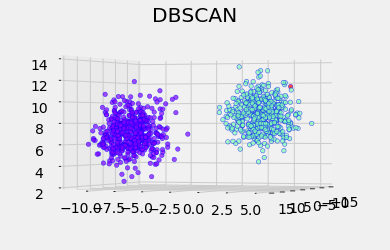

In [30]:
#DBSCAN 
DBSCAN_GRID(X)

HDBSCAN
Adjusted Rand Score:  1.0


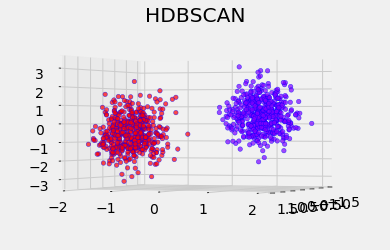

In [31]:
#HDBSCAN
hdbscan(X,5)

K-means
Adjusted Rand Score:  1.0


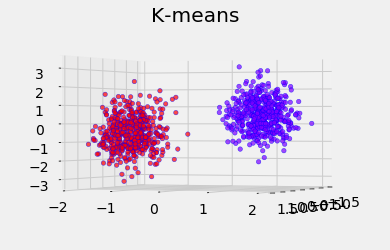

In [32]:
kmeans(X,2)

C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\croon\.conda\conda\envs\Python\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Adjusted Rand Score:  1.0


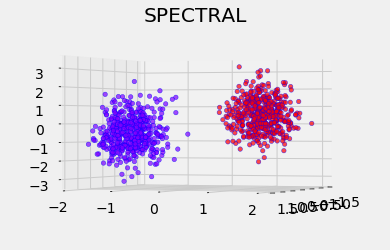

In [33]:
#Spectral
spectal(X)

Hierarchical
Adjusted Rand Score:  1.0


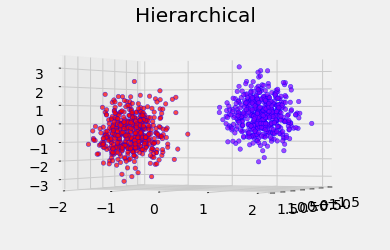

In [34]:
#Hierarchical
hier(X,2)

In [133]:
#Creation of lists to store results
k_rand2=[]
h_rand2=[]
db_rand2=[]
hdb_rand2=[]
spec_rand2=[]

for i in range(100):
    X, labels_true = make_blobs(n_samples=500, centers=2, n_features=3,cluster_std=1.5)
    X = StandardScaler().fit_transform(X)

    kmeans_2(X,2)
    hier_2(X,2)
    hdbscan_2(X,5)
    DBSCAN_GRID2(X)
    spectral_2(X)
    
#Creation of the dataframe to store results
columns=['Hierarchical Rand Score','K-means Rand Score','DBSCAN Rand Score',
         'HDBSCAN Rand Score','Spectral Rand Score']
scores= [h_rand2,k_rand2,db_rand2,hdb_rand2,spec_rand2]

a={'Hierarchical': h_rand2, 
   'K-means': k_rand2,
   'DBSCAN':db_rand2,
   'HDBSCAN':hdb_rand2,
   'Spectral':spec_rand2}
df_small = pd.DataFrame(data=a)
df_small.loc['mean'] = df_small.mean() #mean of the scores for each clustering method
df_small.loc['Std'] = df_small.std() #standard deviation of the scores for each clustering method
df_small=df_small.round(3)
df_small

,Hierarchical,K-means,DBSCAN,HDBSCAN,Spectral
0,1.000,1.000,0.996,0.992,1.000
1,1.000,1.000,1.000,0.996,1.000
2,1.000,0.952,0.922,0.767,1.000
3,1.000,1.000,1.000,0.988,1.000
4,1.000,1.000,1.000,1.000,1.000
...,...,...,...,...,...
97,1.000,0.937,1.000,0.976,1.000
98,1.000,1.000,1.000,1.000,1.000
99,0.984,0.976,0.949,0.789,0.976
mean,0.982,0.981,0.959,0.908,0.988


In [134]:
#save to cvs
df_small.to_csv('3DBlobs_SMALLnoise.csv')
df_small.to_excel('3DBlobs_SMALLnoise.xls')
df_small.to_latex('2DMoons_SMALLnoise.tex')